In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Setup

In [18]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dropout,Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# Read Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Gold_Prediction/gld_price_data.csv')

In [4]:
data_copy = data.copy()

In [5]:
data_copy.shape

(2290, 6)

In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data_copy.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
data_copy.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [9]:
data_copy.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180000,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285000,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167000,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053000,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590000,1.557099
5,2008-01-09,1409.130005,86.550003,75.250000,15.520000,1.466405
6,2008-01-10,1420.329956,88.250000,74.019997,16.061001,1.480100
7,2008-01-11,1401.020020,88.580002,73.089996,16.077000,1.479006
8,2008-01-14,1416.250000,89.540001,74.250000,16.280001,1.486900
9,2008-01-15,1380.949951,87.989998,72.779999,15.834000,1.480210


#Exploratory Data Analysis

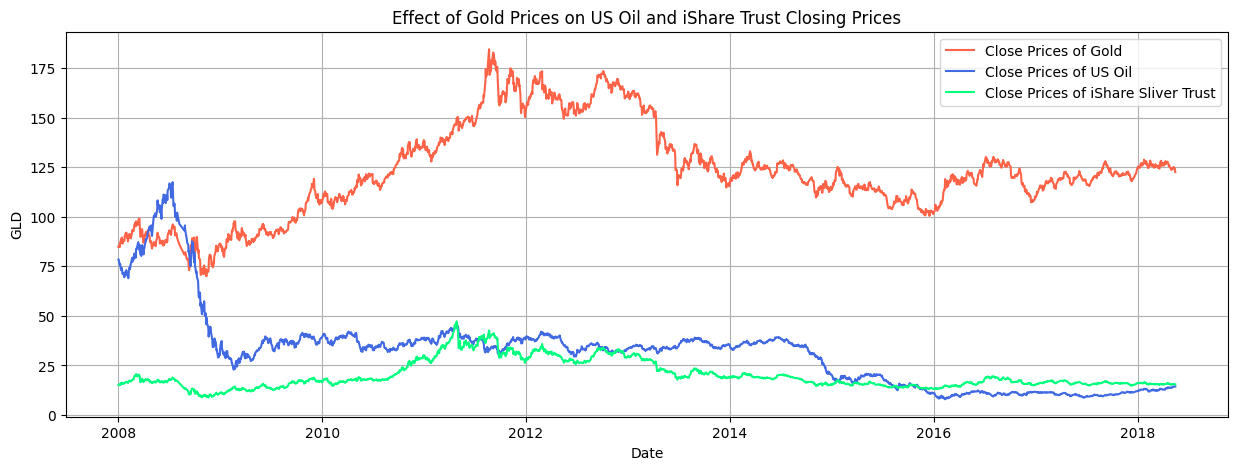

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data = data, x = data['Date'], y = data['GLD'], color='tomato',
             label='Close Prices of Gold'
)

sns.lineplot(data = data, x = data['Date'], y = data['USO'], color='royalblue',
    label='Close Prices of US Oil'
)

sns.lineplot(data = data, x = data['Date'], y = data['SLV'], color='springgreen',
    label='Close Prices of iShare Sliver Trust'
)

plt.title('Effect of Gold Prices on US Oil and iShare Trust Closing Prices')
plt.legend()
plt.grid()
plt.show()

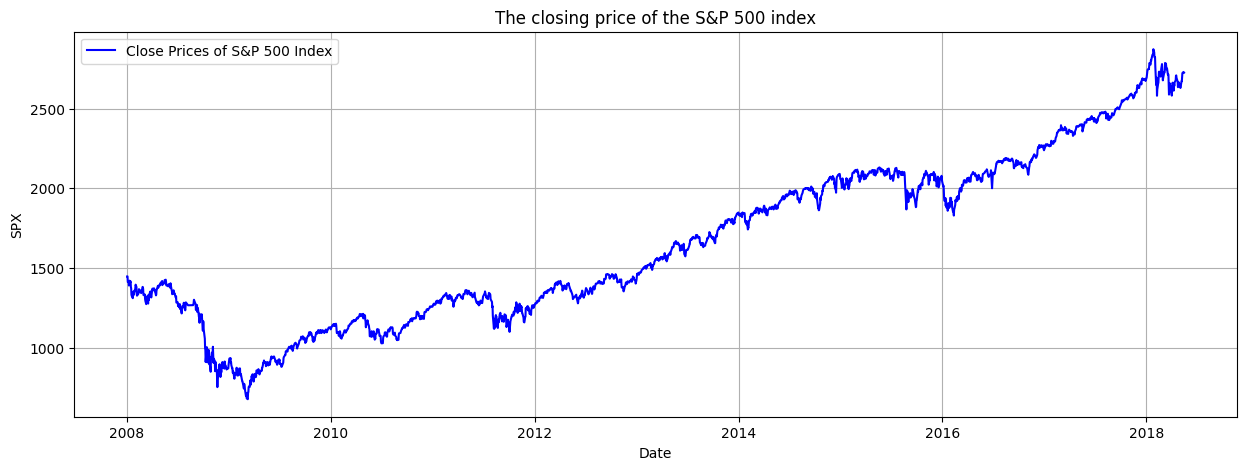

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(data = data, x = data['Date'], y = data['SPX'], color='blue',
    label='Close Prices of S&P 500 Index'
)

plt.title('The closing price of the S&P 500 index')
plt.legend()
plt.grid()
plt.show()

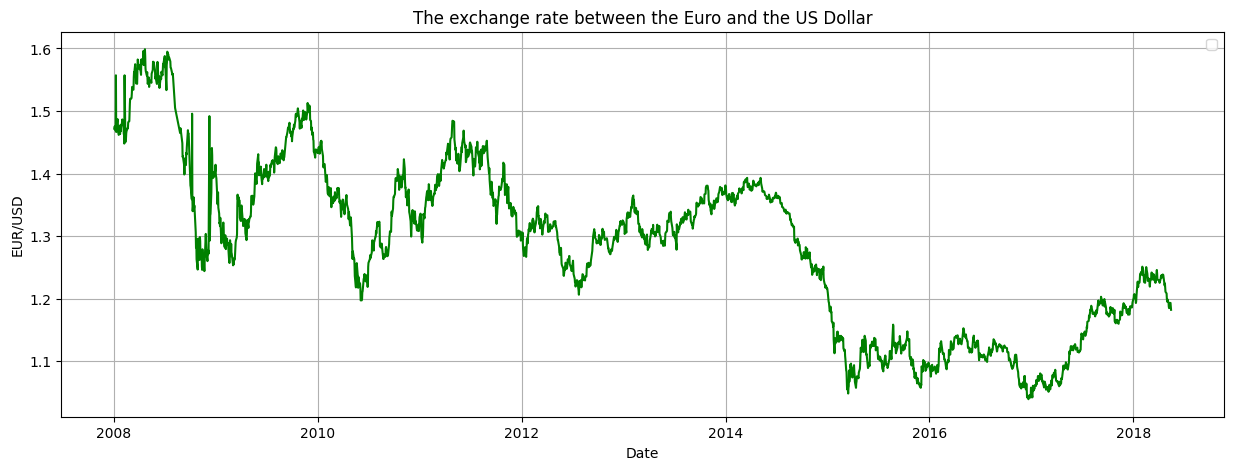

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data = data, x = data['Date'], y = data['EUR/USD'], color='green',
)
plt.title('The exchange rate between the Euro and the US Dollar')
plt.legend()
plt.grid()
plt.show()

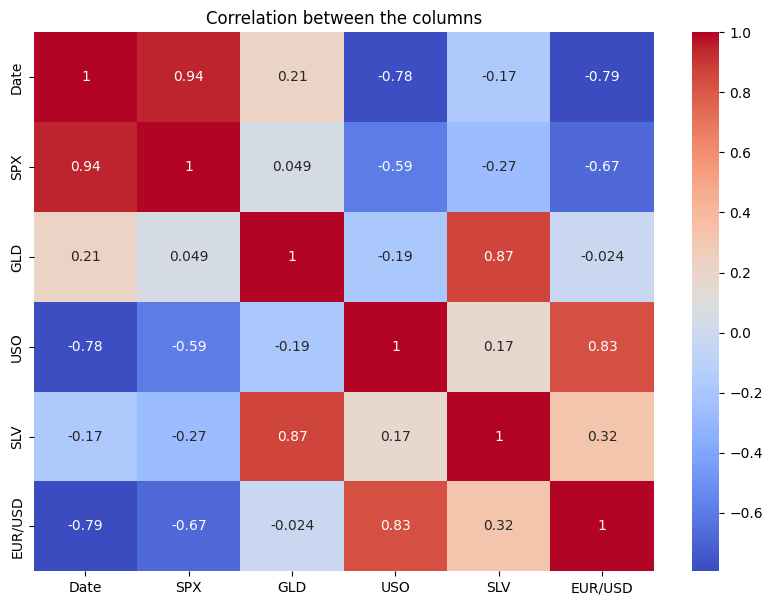

In [14]:
# check correlation between columns
plt.figure(figsize=(10,7))
sns.heatmap(
    data.corr(),
    cmap='coolwarm',
    annot=True
)
plt.title('Correlation between the columns')
plt.show()

#Split the Features on Format of Dataset

In [15]:
def create_feature_target_dataframe(df, column, window_size=5):
    values = df[column].values

    # Initialize lists to store the feature rows and targets
    features = []
    targets = []
    columns = []

    # Loop through the values, taking 5 values as features and the 6th as the target
    for i in range(len(values) - window_size):
        feature_row = values[i:i+window_size]
        target = values[i+window_size]

        # Append the feature row and target to the respective lists
        features.append(feature_row)
        targets.append(target)

    for i in range(window_size):
        col = f"x{i+1}"
        columns.append(col)

    # Create a new DataFrame from the feature rows and targets
    new_df = pd.DataFrame(features, columns=columns)
    new_df['target'] = targets

    return new_df

In [42]:
series_df = create_feature_target_dataframe(
    df = data,
    column = 'GLD',
    window_size=3
)
series_df.head(10)

,x1,x2,x3,target
0,84.860001,85.570000,85.129997,84.769997
1,85.570000,85.129997,84.769997,86.779999
2,85.129997,84.769997,86.779999,86.550003
3,84.769997,86.779999,86.550003,88.250000
4,86.779999,86.550003,88.250000,88.580002
5,86.550003,88.250000,88.580002,89.540001
6,88.250000,88.580002,89.540001,87.989998
7,88.580002,89.540001,87.989998,86.699997
8,89.540001,87.989998,86.699997,86.500000
9,87.989998,86.699997,86.500000,87.419998


In [43]:
x = series_df.drop('target',axis=1)
y = series_df['target']

x.shape,y.shape

((2287, 3), (2287,))

In [44]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.1,
    shuffle=False
)

x_train.shape, x_test.shape

((2058, 3), (229, 3))

#LSTMs Architecture for Forecasting the Gold Prices

In [45]:
x_train = np.array(x_train)
x_test =np.array(x_test)

x_train = x_train.reshape((x_train.shape[0],1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],1, x_test.shape[1]))

x_train.shape, x_test.shape

((2058, 1, 3), (229, 1, 3))

In [46]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='tanh',return_sequences=True ,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Bidirectional(LSTM(units=40,activation='tanh')))
model.add(Dense(units=1,activation='linear'))
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mse'
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
class StopOnTrainingLossIncrease(Callback):
    def __init__(self):
        super(StopOnTrainingLossIncrease, self).__init__()
        self.best_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        if current_loss is None:
            return
        if current_loss > self.best_loss:
            print(f'\nTraining stopped because training loss increased from {self.best_loss:.4f} to {current_loss:.4f}')
            self.model.stop_training = True
        else:
            self.best_loss = current_loss

# Instantiate the custom callback
stop_on_increase = StopOnTrainingLossIncrease()

In [48]:
history = model.fit(
    x= x_train,
    y = y_train,
    batch_size=1,
    epochs=30,
    validation_data=(x_test,y_test),
    callbacks=[stop_on_increase]
)

Epoch 1/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 13639.5684 - val_loss: 9955.9160
Epoch 2/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 9922.1504 - val_loss: 7706.1382
Epoch 3/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 7843.2261 - val_loss: 5815.0527
Epoch 4/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 6130.3081 - val_loss: 4231.9272
Epoch 5/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4395.5894 - val_loss: 2929.5330
Epoch 6/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 3112.5654 - val_loss: 1909.7833
Epoch 7/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2263.0244 - val_loss: 1151.4550
Epoch 8/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1584.6299 - val_loss: 630.8290
Epoch 9/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 1131.9286 - val_loss: 310.5430
Epoch 10/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 886.0466 - val_loss: 141.0713
Epoch 11/30
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step

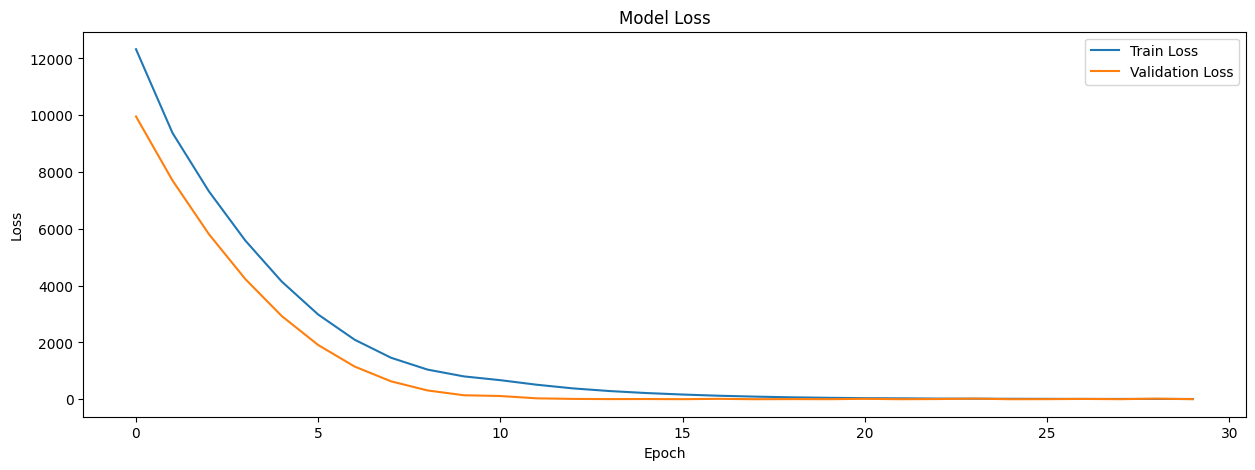

In [49]:
plt.figure(figsize=(15,5))


y_pred = model.predict(x_test, verbose=0)
y_test = np.array(y_test)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
y_pred = model.predict(x_test, verbose=0)
y_test = np.array(y_test)

In [51]:
y_pred.shape,y_test.shape

((229, 1), (229,))

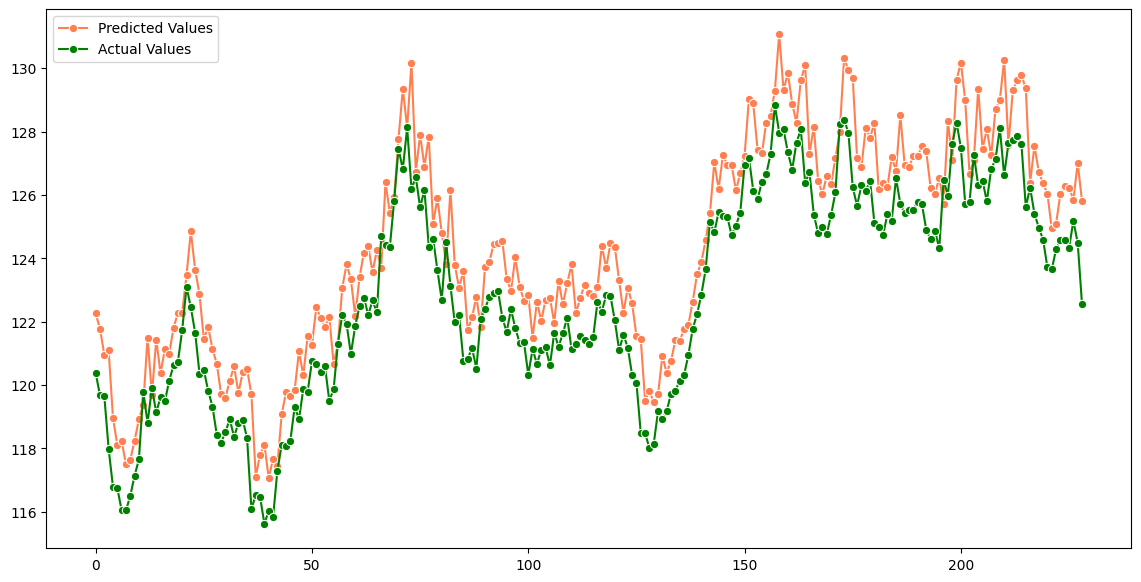

In [55]:
plt.figure(figsize=(14, 7))
sns.lineplot(y_pred.flatten(), label='Predicted Values', marker='o',color='coral')
sns.lineplot(y_test, label='Actual Values',marker='o',color='green')
plt.legend()
plt.show()